In [259]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew


%matplotlib inline

In [260]:
#Bring in the data

nba = pd.read_csv('./data/nba_combined.csv')

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [261]:
nba.dropna(inplace= True)

### Look at the Data

Let us look at the Distribution of the win margins that we will try and predict as well as how well the line does in separating the data.

We also want to look at the value of the points throughout the dataset. As line shopping can be an important factor in final win percentage. 

In [262]:
print('The standard deviation of the Win Margins is ',np.std(nba.home_win_margin))
print('The mean home winning margin is ', nba.home_win_margin.mean())

The standard deviation of the Win Margins is  13.240939632442673
The mean home winning margin is  3.0373493975903614


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


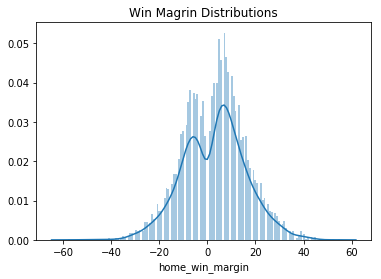

In [263]:
plt.gcf()
sns.distplot(nba.home_win_margin, bins = 150);
plt.title("Win Magrin Distributions");

In [264]:
nba.home_win_margin.value_counts(normalize= True)

 7.0     0.039650
 5.0     0.038554
 8.0     0.034940
 6.0     0.034392
 9.0     0.032202
 10.0    0.031435
 4.0     0.030120
 3.0     0.030120
-7.0     0.028697
-6.0     0.028039
-4.0     0.027930
 2.0     0.027601
 11.0    0.027492
-5.0     0.027054
-2.0     0.026506
-8.0     0.026396
 13.0    0.025849
 12.0    0.024644
-3.0     0.023768
-9.0     0.021906
 1.0     0.020811
-10.0    0.020811
-11.0    0.020263
 16.0    0.019934
-1.0     0.019934
 15.0    0.019715
 14.0    0.019168
-12.0    0.015444
 17.0    0.015225
 18.0    0.013691
           ...   
 34.0    0.001643
 39.0    0.001643
 36.0    0.001643
-32.0    0.001314
-31.0    0.001314
 40.0    0.001205
 35.0    0.001095
 38.0    0.000986
-35.0    0.000657
 42.0    0.000548
 45.0    0.000548
-33.0    0.000548
 43.0    0.000548
 37.0    0.000438
-34.0    0.000438
-41.0    0.000329
 44.0    0.000329
-38.0    0.000329
-50.0    0.000219
-45.0    0.000219
-37.0    0.000219
-58.0    0.000110
 55.0    0.000110
 41.0    0.000110
 52.0    0

Here we can see the importance of some numbers.  The most common outcome is the a home win of 7 that occurs 3.96% of the time.  Since we need 52.38% win rate getting a better line can in many cases overcome the percentage needed to win. Thus it can be critical to have multiple line options

In [265]:
print('The standard deviation of bookmaker errors ',np.std(nba.line_cv))
print('The mean of bookmaker errors', nba.line_cv.mean())

The standard deviation of bookmaker errors  11.779195603404997
The mean of bookmaker errors -0.2763362541073384


/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


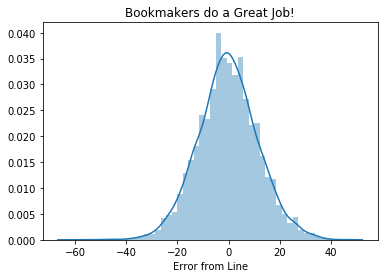

In [266]:
# the outcome scores are normally distributed around a mean of 0 and 
plt.gcf()
sns.distplot(nba.line_cv, axlabel='Error from Line');
plt.title("Bookmakers do a Great Job!");

The Error from the line is pretty normally distributed around zero.  With a mean of .2 and standard deviation of 11.  The standard deviation is high but that is to be expected.  Anyone that has ever watch an NBA game knows that there is large variance at the end of games with teams fouling and shooting with irregularity based on no real reason other than that games characteristics

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


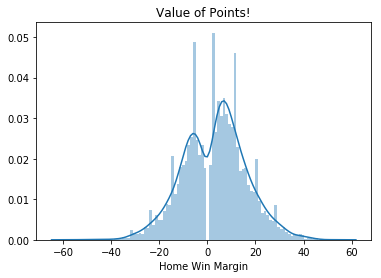

In [267]:

plt.gcf()
sns.distplot(nba.home_win_margin, axlabel='Home Win Margin',bins = 100);
plt.title("Value of Points!");

In [268]:
print('The standard deviation of home_win_margin ',np.std(nba.home_win_margin))
print('The mean of home_win_margin', nba.home_win_margin.mean())

The standard deviation of home_win_margin  13.240939632442673
The mean of home_win_margin 3.0373493975903614


In [269]:
nba.cover.value_counts()

0    4781
1    4349
Name: cover, dtype: int64

In [270]:
nba.cover.value_counts(normalize = True)

0    0.523658
1    0.476342
Name: cover, dtype: float64

Historically the away team has covered 52.36% of the time.  This would suggest that it might be easiest to identify away teams to beat the 52.38 percent mark.

#### Spread 

One would expect the spread to be a predictor of home win margin as it is the line the books put out to divide the action.  The spread should move with the actual win margin.

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Spread by Home Win Margin')

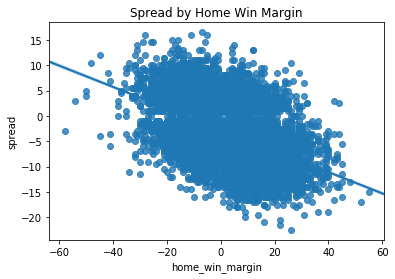

In [271]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.spread)
plt.title("Spread by Home Win Margin")

In [283]:
nba.home_win_margin.corr(nba.spread)
#strong negative correlation as expected since line is opposite of win
#margin

-0.4567449975773007

### Changing rest variables to Dummies

The NBA schedule is not fixed and many teams have a different amount or rest entering games.  In this analysis we combine some categories of games that are no longer common due to schedule changes and then transform the data into dummy variables for analysis.

This analysis transformed the rest into two categories rested and not rested.  



In [272]:
nba.away_rest.value_counts()

1             3332
3IN4-B2B      1580
3IN4          1268
2             1208
B2B            855
3+             471
4IN5-B2B       383
4IN5            11
5IN6-B2B2B       8
4IN5-B2B2B       5
3IN4-B2B2B       4
5IN6             4
B2B2B            1
Name: away_rest, dtype: int64

In [273]:
rest_dict = {'1'          : 0,
             '2'          : 0,
             '3+'         : 0,
             '4IN5-B2B'   : 1,
             '4IN5'       : 1,
             '5IN6-B2B2B' : 1,
             '4IN5-B2B2B' : 1,
             '3IN4-B2B2B' : 1,
             '5IN6'       : 1,
             'B2B2B'      : 1,
             'B2B'        : 1,
             '3IN4'       : 1,
             '3IN4-B2B'   : 1,
             }




In [274]:
nba.away_rest.replace(rest_dict, inplace = True)
nba.rest_days.replace(rest_dict, inplace = True)

In [278]:
nba.home_win_margin.corr(nba.away_rest)
#tired away teams negative increase home win margin

0.032933824935071895

In [279]:
nba.home_win_margin.corr(nba.rest_days)
#tired home teams decrease home win margin

-0.03798933907620376

### Cumulative Stats Variables

There are for cumulative stats variable we generated Average win margin and Average win percentage for both home and away variables

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Cumulative Win Margin Moving Average')

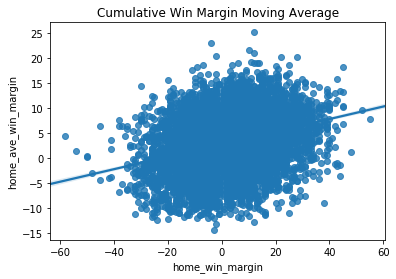

In [281]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_ave_win_margin)
plt.title("Cumulative Win Margin Moving Average")

In [282]:
nba.home_win_margin.corr(nba.home_ave_win_margin)
#strong positive correlation

0.3015112892782498

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Cumulative Home Winning Percentage')

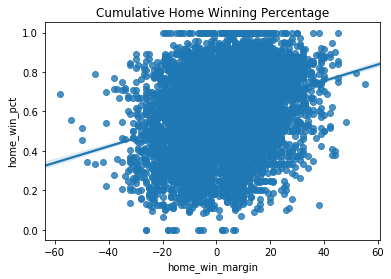

In [284]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_win_pct)
plt.title("Cumulative Home Winning Percentage")

In [285]:
nba.home_win_margin.corr(nba.home_win_pct)
#strong positive correlation

0.284736287852054

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Cumulative Win Margin Moving Average')

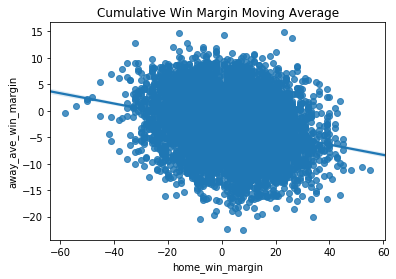

In [286]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.away_ave_win_margin)
plt.title("Cumulative Win Margin Moving Average")

In [287]:
nba.home_win_margin.corr(nba.away_ave_win_margin)


-0.24696979560052892

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Cumulative Away Win Percentage')

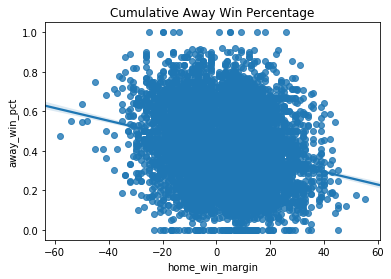

In [288]:

plt.gcf()
sns.regplot(nba.home_win_margin, nba.away_win_pct)
plt.title("Cumulative Away Win Percentage")

In [289]:
nba.home_win_margin.corr(nba.away_win_pct)


-0.232382515242549

### Relative Offensive and Defensive efficiencies

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Offensive Efficeincy Numbers')

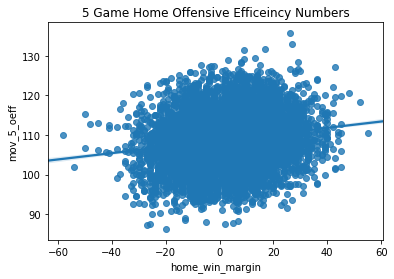

In [321]:

plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_oeff)
plt.title("5 Game Home Offensive Efficeincy Numbers")

In [324]:
nba.home_win_margin.corr(nba.mov_5_oeff)

0.1687757640113142

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Offensive Efficeincy Numbers')

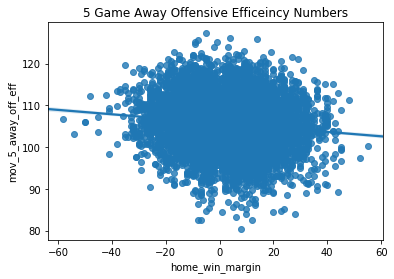

In [323]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_off_eff)
plt.title("5 Game Away Offensive Efficeincy Numbers")

In [322]:
nba.home_win_margin.corr(nba.mov_5_away_off_eff)

-0.11909380461025125

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'3 Game Home Offensive Efficeincy Numbers')

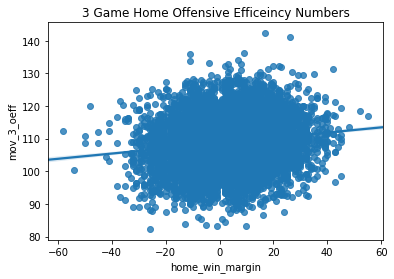

In [325]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_3_oeff)
plt.title("3 Game Home Offensive Efficeincy Numbers")

In [319]:
#eff ratio ratio by line for 3 and 5 game moving averages
nba['eff_ratio1'] = ((nba.mov_5_deff )/(nba.mov_5_away_def_eff ))  
nba['eff_ratio2'] = (nba.mov_5_oeff/ nba.mov_5_away_off_eff) 
nba['eff_ratio3'] = ((nba.mov_3_deff )/(nba.mov_3_away_def_eff ))  
nba['eff_ratio4'] = (nba.mov_3_oeff/ nba.mov_3_away_off_eff)  

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Win Margin Moving Average')

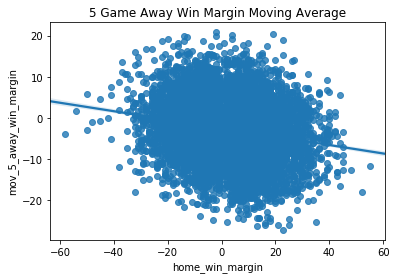

In [197]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_win_margin)
plt.title("5 Game Away Win Margin Moving Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Cumulative Away Win Percentage')

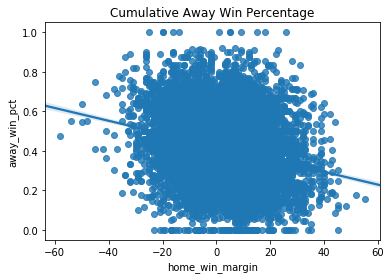

In [201]:

plt.gcf()
sns.regplot(nba.home_win_margin, nba.away_win_pct)
plt.title("Cumulative Away Win Percentage")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Win Margin Moving Average')

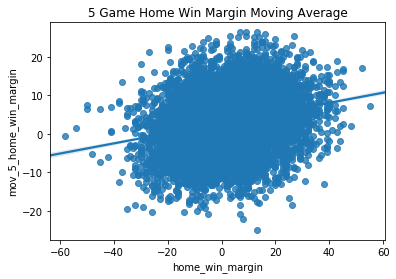

In [202]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_home_win_margin)
plt.title("5 Game Home Win Margin Moving Average")

In [203]:
nba['win_margin_ratio'] = (nba.mov_5_home_win_margin)/(nba.mov_5_away_win_margin)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Win Margin Moving Average')

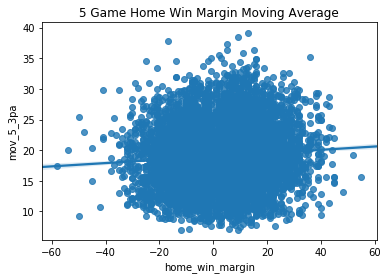

In [204]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_3pa)
plt.title("5 Game Home Win Margin Moving Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away 3 Point Attempts')

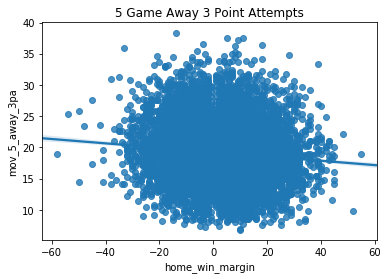

In [205]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_3pa)
plt.title("5 Game Away 3 Point Attempts")

In [206]:
nba['home_score_margin'] = nba.mov_5_home_score*nba.home_ave_win_margin
nba['away_score_margin'] = nba.mov_5_away_score*nba.away_ave_win_margin

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Score * Cumulative Win Margin')

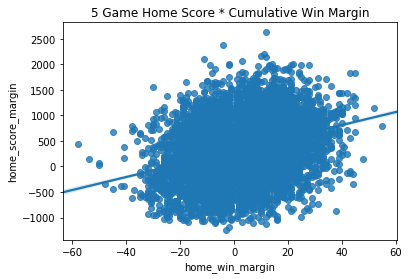

In [207]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Home Score * Cumulative Win Margin")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Score * Cumulative Away Win Margin')

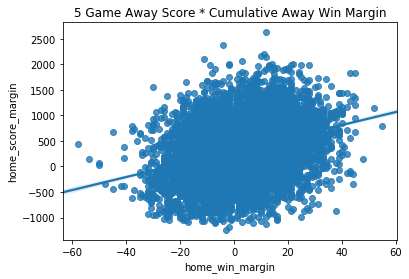

In [208]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Away Score * Cumulative Away Win Margin")

###  Traveling to High Altitude Locations

Traveling to high altitude locations can be tiring for players not used to altitude.  Check to see if these location make a difference.

In [209]:
nba['high_alt'] = nba.teams.map(lambda x: 1 if (x == "Denver") or 
                                (x== "Utah") else 0)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'High Altitude Games')

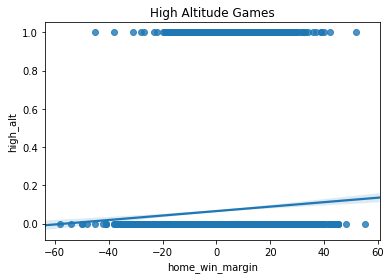

In [210]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.high_alt)
plt.title("High Altitude Games")

#### Assists

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Assist Average')

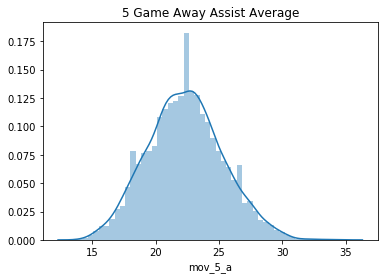

In [236]:
plt.gcf()
sns.distplot(nba.mov_5_a)
plt.title("5 Game Away Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

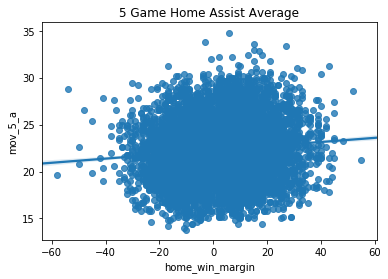

In [237]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_a)
plt.title("5 Game Home Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

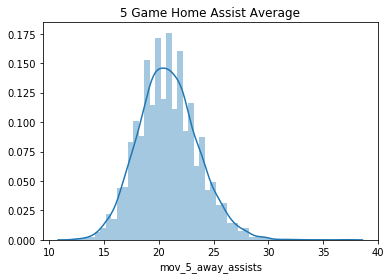

In [234]:
plt.gcf()
sns.distplot(nba.mov_5_away_assists)
plt.title("5 Game Away Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

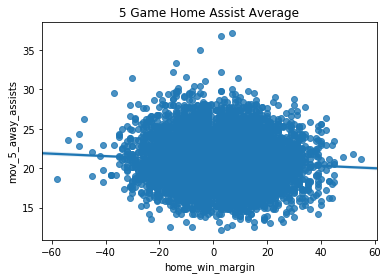

In [235]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_assists)
plt.title("5 Game Home Assist Average")

In [240]:
assist_ratio = nba.mov_5_a/nba.mov_5_away_assists

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

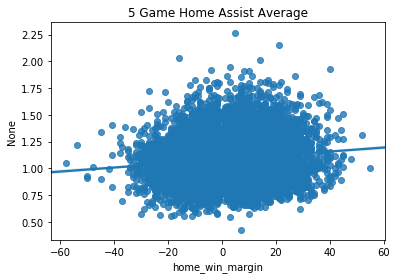

In [241]:
plt.gcf()
sns.regplot(nba.home_win_margin, assist_ratio)
plt.title("5 Game Home Assist Average")

### Travel from West Coast/ East Coast

It is hypothesized that Traveling from West Coast to East Coast is more difficult as losing time makes it tougher to acclimate.  Check to see if this is a factor

In [211]:
### Travel Distance

In [212]:
nba.dataset.value_counts()

2006-2007 Regular Season    1058
2007-2008 Regular Season     994
2009-2010 Regular Season     982
2008-2009 Regular Season     982
2010-2011 Regular Season     980
2014-2015 Regular Season     914
2013-2014 Regular Season     914
2012-2013 Regular Season     903
2011-2012 Regular Season     758
2009 Playoffs                 85
2008 Playoffs                 82
2007 Playoffs                 78
2010 Playoffs                 76
2015 Playoffs                 75
2013 Playoffs                 67
2011 Playoffs                 63
2012 Playoffs                 61
2014 Playoffs                 58
Name: dataset, dtype: int64

In [213]:
nba['playoff_game'] = nba.dataset.map(lambda x:1 if x[5] =='P' else 0)

In [214]:
nba.playoff_game.value_counts()

0    8485
1     645
Name: playoff_game, dtype: int64

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'playoff games')

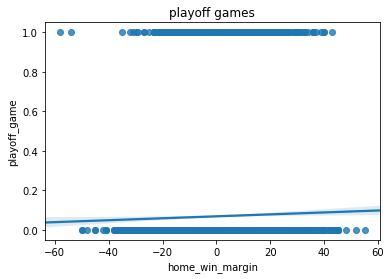

In [215]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.playoff_game)
plt.title("playoff games")

In [306]:
features = ['cover', 'home_win_margin', #classification and regression targets
            'away_rest', 'rest_days', 'home_win_pct', 'away_win_pct',
            'home_ave_win_margin', 'away_ave_win_margin']
            
#             'eff_ratio1',  'eff_ratio2', 'eff_ratio3', 'eff_ratio4',
#             'spread', ,
#            'mov_5_fta', 'mov_5_away_fta', 
#            'mov_5_home_score', 'mov_5_away_score',
#            'mov_5_tot', 'mov_5_away_total_reb',
#            'mov_5_away_off_eff', 'mov_5_away_def_eff', 
#             'mov_5_away_assists', 'mov_5_home_win_margin',
#            'mov_5_win', 'mov_5_away_win_margin', 'home_score', 
#             'away_score', ,
#            'high_alt', 'home_ave_win_margin', 'away_ave_win_margin',
#            'playoff_game', 'away_win_margin', 'mov_5_3pa', 
#            'mov_5_away_3pa', 'home_score_margin', 'away_score_margin',
#            'mov_2_fta', 'mov_2_away_fta', 
#            'mov_2_home_score', 'mov_2_away_score',
#            'mov_2_tot', 'mov_2_away_total_reb',
#            'mov_2_away_off_eff', 'mov_2_away_def_eff', 
#             'mov_2_away_assists', 'mov_2_home_win_margin',
#            'mov_2_win', 'mov_2_away_win_margin', 'mov_2_3pa', 
#             'mov_2_away_3pa', 'away_rest', 'rest_days']           

In [307]:
nba2 = nba[features]

In [308]:
nba2.to_csv('./data/nba_analysis_data.csv', index = False)

In [ ]:
nba.columns[0:50]